In [75]:
import json
import joblib
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

In [67]:
df = pd.read_csv("../Data/processed_data/all_final_for_model.csv")
X, y = df.drop(['fare_to_predict'], axis=1), df.fare_to_predict

In [68]:
test_indices = json.load(open("../Data/precomputes/test_indices.json"))
df_training, df_testing = df.drop(test_indices), df.iloc[test_indices]
X_train, X_test = X.drop(test_indices), X.iloc[test_indices]
y_train, y_test = y.drop(test_indices), y.iloc[test_indices]

In [65]:
model_params = {
    'linear_regression': {
        'model': LinearRegression(),
        'params': {}
    },
    'decision_tree_regression': {
        'model': DecisionTreeRegressor(),
        'params': {
            'max_depth': [5, 10, 20, 30]
        }
    },
    'gradient_boosting_regression': {
        'model': GradientBoostingRegressor(),
        'params': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 4, 5]
        }
    },
    'random_forest_regression': {
        'model': RandomForestRegressor(),
        'params': {
            'n_estimators': [10, 50, 100],
            'max_depth': [5, 10, 20, 30]
        }
    }
}

In [69]:
scores = []

for i, (model_name, mp) in enumerate(model_params.items()):
    print(f"Running for {i+1}/{len(model_params)} model ({model_name})...")
    clf = RandomizedSearchCV(mp['model'], mp['params'], cv=3, return_train_score=False, n_iter=5)
    clf.fit(X, y)
    joblib.dump(clf.best_estimator_, f"trained_models/{model_name}.pkl")
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    print(scores[-1])
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

Running for 1/4 model (linear_regression)...


D:\LearningPython\venv\Lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 1 is smaller than n_iter=5. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


{'model': 'linear_regression', 'best_score': 0.8484724336910968, 'best_params': {}}
Running for 2/4 model (decision_tree_regression)...


D:\LearningPython\venv\Lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 4 is smaller than n_iter=5. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


{'model': 'decision_tree_regression', 'best_score': 0.9880384339381411, 'best_params': {'max_depth': 10}}
Running for 3/4 model (gradient_boosting_regression)...
{'model': 'gradient_boosting_regression', 'best_score': 0.9896695190212279, 'best_params': {'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1}}
Running for 4/4 model (random_forest_regression)...
{'model': 'random_forest_regression', 'best_score': 0.9892371283090617, 'best_params': {'n_estimators': 10, 'max_depth': 10}}


,model,best_score,best_params
0,linear_regression,0.848472,{}
1,decision_tree_regression,0.988038,{'max_depth': 10}
2,gradient_boosting_regression,0.989670,"{'n_estimators': 100, 'max_depth': 5, 'learnin..."
3,random_forest_regression,0.989237,"{'n_estimators': 10, 'max_depth': 10}"


Text(0, 0.5, 'Model Accuracy')

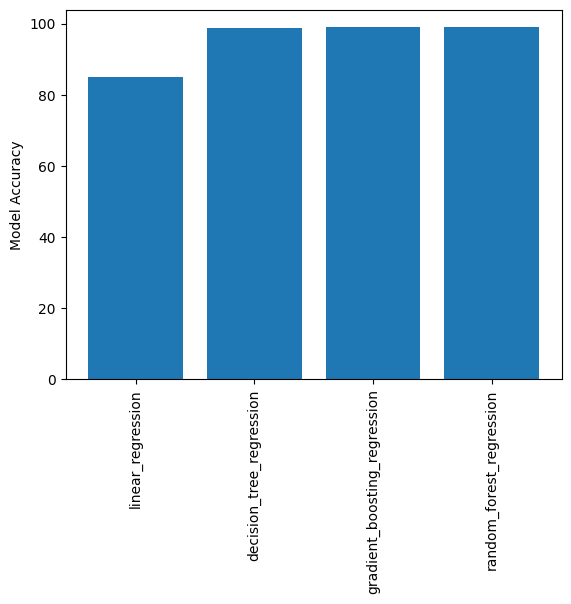

In [74]:
plt.bar(df.model, df.best_score*100)
plt.xticks(rotation=90)
plt.ylabel("Model Accuracy")